# Análise Exploratória de Dados com Python

## Análise Bivariada

O objetivo deste notebook é apresentar as principais funções em Python para conduzir uma análise bivariada de dados, a saber:  
- Correlação de Pearson
- Information Value
- Extra: Gráficos

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'2.1.4'

In [3]:
np.__version__

'1.26.4'

In [4]:
# Definir o número de casas decimais desejado
pd.set_option('display.float_format', '{:.2f}'.format)

### Contexto 
Suponha que você necessite fazer uma análise sobre a saúde dos funcionários de uma empresa. 
A base de dados disponível possui informações de funcionários de várias profissões e incluem dados de idade, atividade física, avaliação cardíaca, qualidade do sono, entre outras.

### Carregando dados
Referência:  
Adaptado de https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset  
(sob Licença CC0 - Domínio Público)

In [5]:
# Lendo a base de dados no formato de planilha Excel
df = pd.read_excel('dados_sono_e_saude.xlsx').set_index('ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gênero                     373 non-null    object 
 1   Idade                      374 non-null    int64  
 2   Profissão                  374 non-null    object 
 3   Duração do sono            374 non-null    float64
 4   Qualidade do sono          374 non-null    int64  
 5   Nível de Atividade Física  374 non-null    int64  
 6   Nível de Stress            374 non-null    int64  
 7   Categoria IMC              374 non-null    object 
 8   Pressão Sanguínea          374 non-null    object 
 9   Batimento Cardíaco         374 non-null    int64  
 10  Passos diários             374 non-null    int64  
 11  Distúrbio do sono          374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [6]:
df.head(3)

,Gênero,Idade,Profissão,Duração do sono,Qualidade do sono,Nível de Atividade Física,Nível de Stress,Categoria IMC,Pressão Sanguínea,Batimento Cardíaco,Passos diários,Distúrbio do sono
ID,,,,,,,,,,,,
1,M,27,Engenheiro de Software,6.10,6,42,6,Sobrepeso,126/83,77,4200,-
2,NaN,28,Médico,6.20,6,60,8,Normal,125/80,75,10000,-
3,M,28,Médico,6.20,6,60,8,Normal,125/80,75,10000,-


### Correlação de Pearson

A correlação de Pearson é uma medida estatítisca para avaliar o grau de associação entre duas variáveis de tipo numérico.  

**Exemplo**: existe correlação entre a idade do funcionário e o nível de atividade física?

In [7]:
# usando numpy - Resultado matriz
np.corrcoef(df['Idade'], df['Nível de Atividade Física'], rowvar=False)

array([[1.        , 0.17899272],
       [0.17899272, 1.        ]])

In [8]:
# usando pandas - resultado escalar
df['Idade'].corr(df['Nível de Atividade Física'], method='pearson')

0.17899272043316178

In [9]:
# usando pandas - resultado matriz geral
df.corr(method='pearson', numeric_only=True)

,Idade,Duração do sono,Qualidade do sono,Nível de Atividade Física,Nível de Stress,Batimento Cardíaco,Passos diários
Idade,1.00,0.34,0.47,0.18,-0.42,-0.23,0.06
Duração do sono,0.34,1.00,0.88,0.21,-0.81,-0.52,-0.04
Qualidade do sono,0.47,0.88,1.00,0.19,-0.90,-0.66,0.02
Nível de Atividade Física,0.18,0.21,0.19,1.00,-0.03,0.14,0.77
Nível de Stress,-0.42,-0.81,-0.90,-0.03,1.00,0.67,0.19
Batimento Cardíaco,-0.23,-0.52,-0.66,0.14,0.67,1.00,-0.03
Passos diários,0.06,-0.04,0.02,0.77,0.19,-0.03,1.00


### Information Value (IV)

Information Value (IV) é uma medida estatítisca para avaliar o grau de associação entre duas variáveis de tipo categórica (nominal), sendo uma delas binária (evento/ não evento) 

Para o cálculo do IV, tem-se as seguintes etapas:
1) Definir as variáveis que serão analisadas, e qual a binária (evento/ não evento)
2) Calcular o % de eventos e o % de não-eventos em cada categoria por meio da tabela de frequência relativa
3) Calcular o ln (logaritmo natural) da divisão entre % de eventos e % de não-eventos (Odds)
4) Multiplicar o resultado do cálculo anterior pela somatória da diferença entre % de eventos e % não eventos de eventos e somar para obter o IV final

**Exemplo**: qual o IV da Categoria IMC em relação a distúrbio do sono?

**Etapa 1:**  
1.a) Conhecendo as variáveis que serão analisadas: _Distúrbio do sono_

In [10]:
df['Distúrbio do sono'].value_counts()

Distúrbio do sono
-                 220
Apneia do sono     78
Insônia            76
Name: count, dtype: int64

Como a variável _"Distúrbio do sono"_ possui 3 valores distintos, vamos transformá-la para uma variável indicadora com os valores "Sim"/"Não", sendo "Sim" para qualquer tipo de Distúrbio do sono (apneia ou insônia) e Não no caso de ausência de Distúrbio do sono

In [11]:
df['Indicador - Distúrbio do sono'] = df['Distúrbio do sono']!='-'
df['Indicador - Distúrbio do sono'] = df['Indicador - Distúrbio do sono'].replace(True,'Sim')
df['Indicador - Distúrbio do sono'] = df['Indicador - Distúrbio do sono'].replace(False,'Não')

In [12]:
df['Indicador - Distúrbio do sono'].value_counts()

Indicador - Distúrbio do sono
Não    220
Sim    154
Name: count, dtype: int64

1.b) Conhecendo as variáveis que serão analisadas: _Categoria IMC_

In [13]:
df['Categoria IMC'].value_counts()

Categoria IMC
Normal       216
Sobrepeso    148
Obeso         10
Name: count, dtype: int64

**Etapa 2:**  
Criando a tabela de frequência relativa das variáveis

In [14]:
tabela_frequencia = pd.crosstab(df['Categoria IMC'],df['Indicador - Distúrbio do sono'],
                                margins=True, margins_name='Total')
tabela_frequencia

Indicador - Distúrbio do sono,Não,Sim,Total
Categoria IMC,,,
Normal,200,16,216
Obeso,1,9,10
Sobrepeso,19,129,148
Total,220,154,374


In [15]:
tabela_frequencia_relativa = pd.crosstab(df['Categoria IMC'],df['Indicador - Distúrbio do sono'],
                                margins=True, margins_name='Total', normalize='columns')
#tabela_frequencia_relativa.style.format('{:.3f}')
tabela_frequencia_relativa.style.format('{:.1%}')

Indicador - Distúrbio do sono,Não,Sim,Total
Categoria IMC,,,
Normal,90.9%,10.4%,57.8%
Obeso,0.5%,5.8%,2.7%
Sobrepeso,8.6%,83.8%,39.6%


**Etapa 3:**  
Criando a coluna de ln(Odds)

In [16]:
tabela_frequencia_relativa['ln(Odds)'] = np.log(tabela_frequencia_relativa['Não']/tabela_frequencia_relativa['Sim'])
tabela_frequencia_relativa #.style.format('{:.1%}')                       

Indicador - Distúrbio do sono,Não,Sim,Total,ln(Odds)
Categoria IMC,,,,
Normal,0.91,0.10,0.58,2.17
Obeso,0.00,0.06,0.03,-2.55
Sobrepeso,0.09,0.84,0.40,-2.27


**Etapa 4:**  
Calculando IV

In [17]:
tabela_frequencia_relativa['IV'] = (tabela_frequencia_relativa['Não']-tabela_frequencia_relativa['Sim'])*tabela_frequencia_relativa['ln(Odds)']
tabela_frequencia_relativa #.style.format('{:.1%}')                            

Indicador - Distúrbio do sono,Não,Sim,Total,ln(Odds),IV
Categoria IMC,,,,,
Normal,0.91,0.10,0.58,2.17,1.75
Obeso,0.00,0.06,0.03,-2.55,0.14
Sobrepeso,0.09,0.84,0.40,-2.27,1.71


In [18]:
# IV para a variável "Categoria IMC"
tabela_frequencia_relativa['IV'].sum().round(2)

3.59

Esse IV para Categoria IMC é bastante alto - cabe consultar um especialista no assunto para entender a validade do resultado; do contrário, desconfie de um IV tão elevado...   
Vamos verificar para outras categorias, mas para evitar repetições no código, vamos criar uma função para cálculo do IV.

In [19]:
def iv(x,y):
    """
    x: Pandas Series
    y: Pandas Series, dtype boolean
    """
    df=pd.crosstab(x,y,margins=True, margins_name='Total', normalize='columns')
    df['ln(Odds)'] = np.log(df[True]/df[False])
    df['IV'] = (df[True]-df[False])*df['ln(Odds)']
    return df.style.format('{:.1%}'), df['IV'].sum().round(2)

Aplicando a função de cálculo do IV para a variável "Gênero"

In [20]:
#criando a variável booleana para "Distúrbio do sono"
df['Indicador - Distúrbio do sono'] = df['Distúrbio do sono']!='-'
# avaliando a variável "Gênero"
df_iv_genero,iv_genero = iv(df['Gênero'],df['Indicador - Distúrbio do sono'])
df_iv_genero

Indicador - Distúrbio do sono,False,True,Total,ln(Odds),IV
Gênero,,,,,
F,37.4%,66.9%,49.6%,58.0%,17.1%
M,62.6%,33.1%,50.4%,-63.6%,18.7%


In [21]:
iv_genero

0.36

### Gráficos

#### 2 variáveis quantitativas - gráfico de dispersão

Exemplo Slide - com Matplotlib e Pyplot

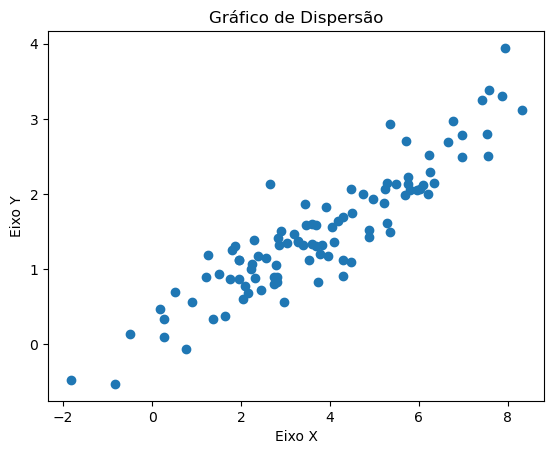

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 100)
y =0.4 * x + np.random.randn(100) * 0.4

# Criar o gráfico de dispersão
plt.scatter(x, y)

# Personalizar o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Mostrar o gráfico
plt.show()

Exemplo Slide - com Matplotlib - outra forma

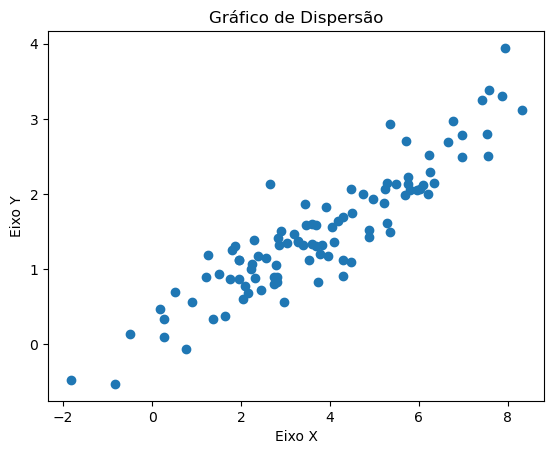

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 100)
y =0.4 * x + np.random.randn(100) * 0.4

# Criar figuras e eixos explicitamente
fig, ax = plt.subplots()

# Plotar um gráfico de dispersão
ax.scatter(x, y)

# Personalizar o gráfico
ax.set_title('Gráfico de Dispersão')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Mostrar o gráfico
plt.show()

Exemplo - com dados do caso de saúde dos funcionários da empresa

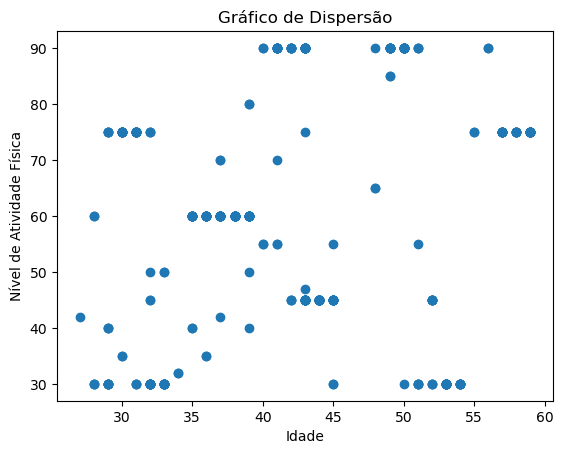

In [30]:
# Criar o gráfico de dispersão com matplotlib e pyplot
plt.scatter(df['Idade'],df['Nível de Atividade Física'])

# Personalizar o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Idade')
plt.ylabel('Nível de Atividade Física')

# Mostrar o gráfico
plt.show()

**Observação**:  
O aspecto do gráfico de dispersão acima reflete a baixa correlação linear (0,18) verificada entre as variáveis "Idade" e "Nível de Atividade Física"

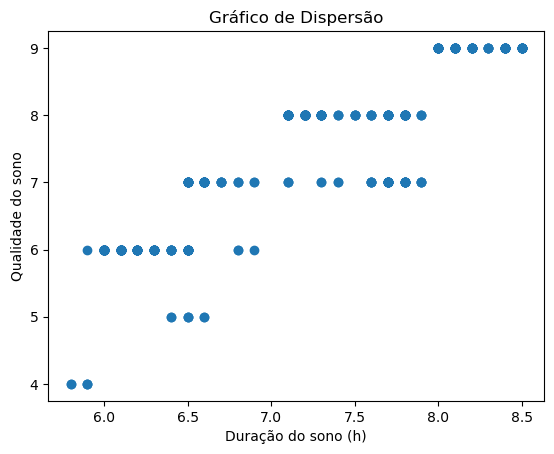

In [31]:
# Criar o gráfico de dispersão com matplotlib e pyplot
plt.scatter(df['Duração do sono'],df['Qualidade do sono'])

# Personalizar o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Duração do sono (h)')
plt.ylabel('Qualidade do sono')

# Mostrar o gráfico
plt.show()

**Observação**:  
O aspecto do gráfico de dispersão acima reflete a correlação linear elevada (0,88) verificada entre as variáveis "Duração do sono" e "Qualidade do sono"

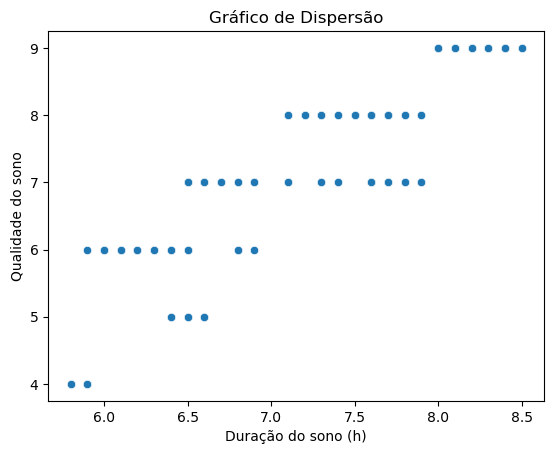

In [32]:
# Criar o gráfico de dispersão com seaborn
import seaborn as sns

sns.scatterplot(x=df['Duração do sono'], y=df['Qualidade do sono'], data=df)

# Personalizar o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Duração do sono (h)')
plt.ylabel('Qualidade do sono')

# Mostrar o gráfico
plt.show()

#### 1 variável quantitativa e 1 qualitativa - boxplot

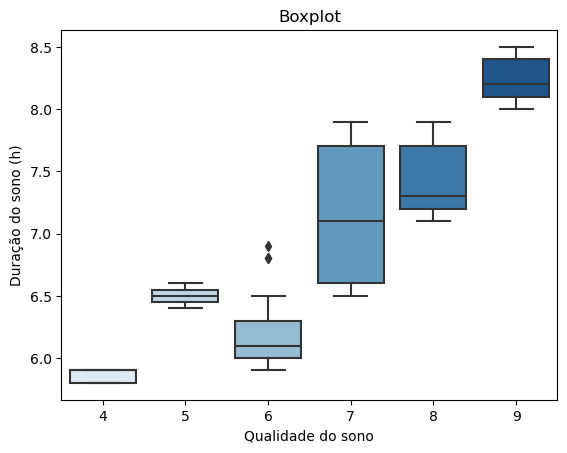

In [33]:
# Criar o boxplot com seaborn
sns.boxplot(x=df['Qualidade do sono'],y=df['Duração do sono'],palette='Blues')
           
# Personalizar o gráfico
plt.title('Boxplot')
plt.xlabel('Qualidade do sono')
plt.ylabel('Duração do sono (h)')

# Mostrar o gráfico
plt.show()